### Import Package

In [1]:
import sys
sys.path.append("e:\conda\envs\pythonproject01\lib\site-packages")
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
import random
import rdkit
import pandas as pd
import matplotlib.colorbar as cbar

### Input Data

In [28]:
data=pd.read_csv(".\\f1_32rmc_csv\\fs45_feature table.csv")
cm=data.corr()

### Draw Heatmap

In [29]:
abs_cm = np.abs(cm)
abs_cm.head()

,AATS2m,AATS3m,AATS4p,AATS8p,AATSC0p,AATSC2p,AATSC4c,AATSC4p,AATSC5e,AATSC7e,...,minHBd,n3HeteroRing,n5Ring,nHBint10,nHdNH,nS.1,nT10HeteroRing,nwHBa,piPC7,pIC50
AATS2m,1.000000,0.855761,0.589570,0.233856,0.198615,0.089778,0.260079,0.255647,0.285894,0.186435,...,0.275523,0.183658,0.212787,0.114798,0.090271,0.089624,0.180737,0.297095,0.197595,0.026114
AATS3m,0.855761,1.000000,0.519899,0.134439,0.387973,0.116360,0.191088,0.162610,0.194726,0.132490,...,0.153630,0.132852,0.026649,0.203618,0.079567,0.349025,0.015480,0.210506,0.128869,0.026206
AATS4p,0.589570,0.519899,1.000000,0.580847,0.083773,0.261905,0.008913,0.538509,0.112445,0.041508,...,0.208182,0.421371,0.514832,0.054889,0.072774,0.009072,0.026103,0.718428,0.638592,0.184332
AATS8p,0.233856,0.134439,0.580847,1.000000,0.096440,0.282624,0.091262,0.332373,0.306967,0.055677,...,0.531342,0.320235,0.281874,0.178941,0.211578,0.028617,0.028362,0.745512,0.640417,0.100356
AATSC0p,0.198615,0.387973,0.083773,0.096440,1.000000,0.731130,0.320654,0.092309,0.369281,0.538555,...,0.238104,0.018806,0.289129,0.343502,0.048482,0.767065,0.126373,0.241518,0.481928,0.039322


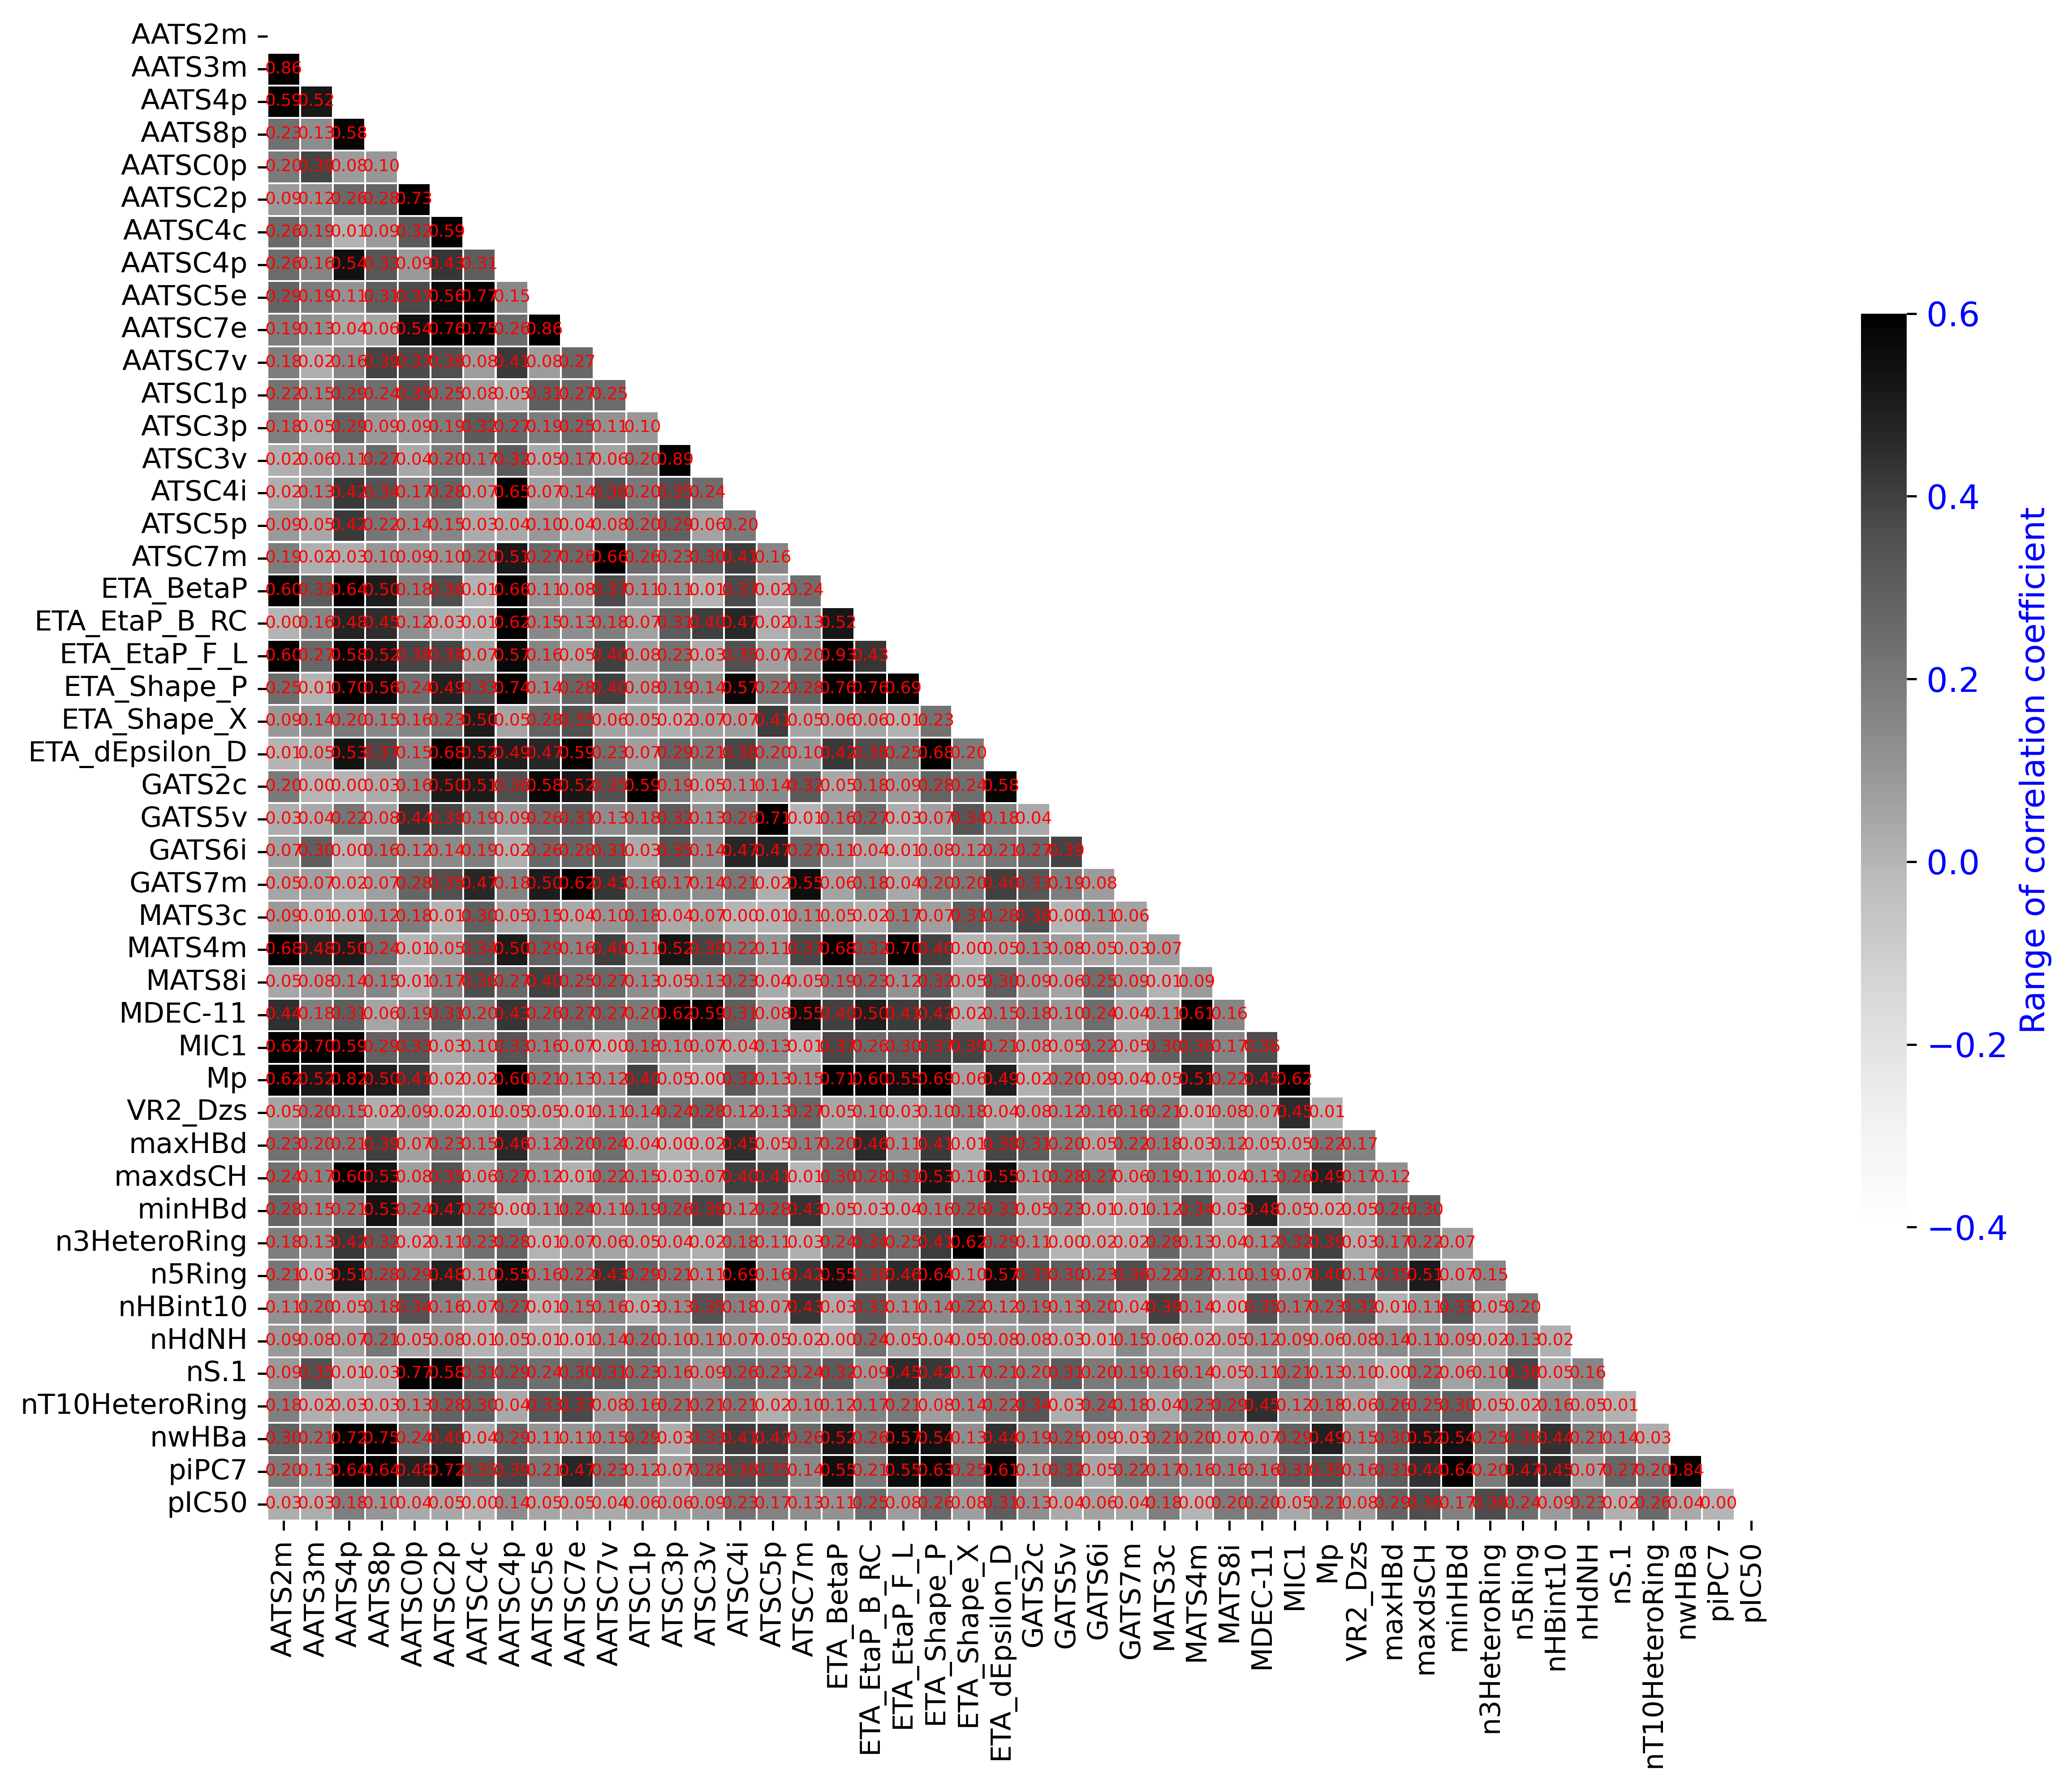

In [33]:
plt.figure(figsize=(12,12),dpi=450)  #画布大小

cmap=sns.heatmap(data=abs_cm,
            vmin=-0.4, #调整cbar的刻度范围，vmin-vmax
            vmax=0.6, 
            annot=True,
            fmt=".2f",  #热图中的数值保留2位小数
            annot_kws={'size':6,'weight':'normal', 'color':'red'}, #字体大小，字体风格和字体颜色
            mask=np.triu(np.ones_like(cm,dtype=np.bool)),#仅显示对脚线下面部分图
            square=True, linewidths=0.5,#外框显示，外框宽度设置
            cbar_kws={"shrink": .5},
            cmap="Greys"
           )

cbar = cmap.collections[0].colorbar  #色棒对象建立
cbar.ax.tick_params(labelsize=12,labelcolor="blue")  #色板刻度字体大小和颜色调整
cbar.ax.set_ylabel(ylabel="Range of correlation coefficient",size=12,color="blue",loc="center") #色棒标签设置


plt.savefig(r".\\corrmap_f45.png")

### Some test:

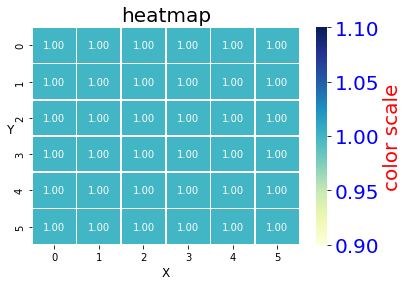

In [47]:

#练习的数据：
data=np.arange(-18,18).reshape(6,6)
data=pd.DataFrame(data).corr()

#绘制热度图：
tick_=np.arange(-20,20,5).astype(float)
dict_={'orientation':'vertical',"label":"color  \
scale","drawedges":True,"ticklocation":"right","extend":"min", \
"filled":True,"alpha":0.8,"cmap":"cmap","ticks":tick_,"spaci,linewidths=0.5ng":'proportional'}
#绘制添加数值和线条的热度图：
cmap = sns.heatmap(data,linewidths=0.8,annot=True,fmt=".2f",cmap="YlGnBu")

plt.xlabel("X",size=12)
plt.ylabel("Y",size=12,rotation=0)
plt.title("heatmap",size=20)

#调整色带的标签：
cbar = cmap.collections[0].colorbar
cbar.ax.tick_params(labelsize=20,labelcolor="blue")
cbar.ax.set_ylabel(ylabel="color scale",size=20,color="red",loc="center")


plt.show()

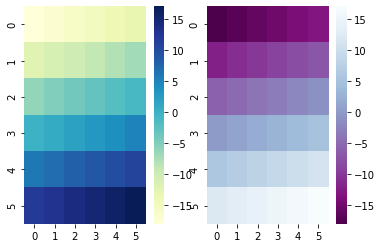

In [195]:
#练习的数据：
data=np.arange(-18,18).reshape(6,6)
flights=pd.DataFrame(data)
fig,ax=plt.subplots(1,2)

sns.heatmap(flights, cmap="YlGnBu",ax=ax[0])
sns.heatmap(flights, cmap="BuPu_r",ax=ax[1])
plt.savefig(r"C:\Users\TSPC\map.png")

<class 'matplotlib.axes._subplots.AxesSubplot'>


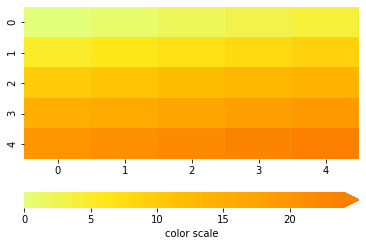

In [139]:
fig,ax=plt.subplots()

data=np.arange(25).reshape(5,5)
data=pd.DataFrame(data)

#色棒的参数字典：
dict_={'orientation':'horizontal',"label":"color scale","ticklocation":"top","extend":"max","filled":True,"alpha":0.8,"cmap":"cmap"}

cmap=sns.heatmap(data,cmap='Wistia',cbar_kws=dict_)

plt.show()

<class 'matplotlib.axes._subplots.AxesSubplot'>
<class 'matplotlib.colorbar.Colorbar'>


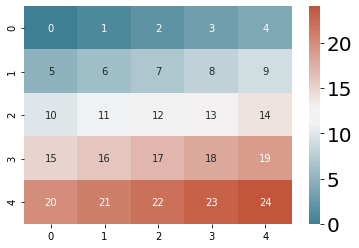

In [178]:
x = arange(25).reshape(5, 5)
cmap = sns.diverging_palette(220, 20, sep=20, as_cmap=True)
ax = sns.heatmap(x, cmap=cmap,annot=True,fmt="d")
# use matplotlib.colorbar.Colorbar object
cbar = ax.collections[0].colorbar
print(type(ax))
print(type(cbar))
# here set the labelsize by 20
cbar.ax.tick_params(labelsize=20)
plt.show()